In [9]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#4)

DATA =  np.array([0.9, 1.0, 1.2, 2.2, 1.9, 3.6, 2.8, 5.2, 1.8, 2.1, 6.8, 1.3, 3.0, 4.5, 2.8, 2.3, 2.7, 5.7, 4.8, 3.5, 2.6, 3.3, 5.0, 4.0, 7.2, 9.1, 2.8, 3.6, 7.3, 9.0])
#a)
xb = np.mean(DATA) # Estimación puntual de la media
#b)
p = 0.975  # Probabilidad de error
z975 = stats.norm.ppf(p) # Z para la probabilidad de error
ME = z975*np.std(DATA)/np.sqrt(len(DATA)) 	#Magen de error
#c)
li = xb - ME
ls = xb + ME
print(f"Intervalo de confianza: [{li:.2f}, {ls:.2f}]")
#d)
DATA_S = pd.Series(DATA)
DATA_S.describe().to_frame().T

Intervalo de confianza: [3.01, 4.59]


,count,mean,std,min,25%,50%,75%,max
0,30.0,3.8,2.257249,0.9,2.225,3.15,4.95,9.1


In [5]:
def f(ME: int)->float:
	sigma = 0.15
	return ((z975*sigma)/ME)**2

print(f"f(0.07) = {f(0.07)}")
print(f"f(0.05) = {f(0.05)}")
print(f"f(0.03) = {f(0.03)}")


f(0.07) = 17.639351727677106
f(0.05) = 34.573129386247125
f(0.03) = 96.03647051735315


In [6]:
def var_intervals(n:float, S2:float, chi2_ls:float, chi2_li:float) -> tuple[float, float]:
	return ((n-1)*S2)/(chi2_ls), ((n-1)*S2)/(chi2_li)

def std_intervals(interval: tuple) -> tuple[float, float]:
	return interval[0]**0.5, interval[1]**0.5

n = 18
S2 = 0.36
pi = 0.05
ps = 0.925
chi2 = stats.chi2(df = n-1)
chi2_025 = chi2.ppf(pi)
chi2_925 = chi2.ppf(ps)
var_interval = var_intervals(n, S2, chi2_925,chi2_025)
std_interval = std_intervals(var_interval)
print(f"Intervalo de confianza para la varianza: [{var_interval[0]:.2f}, {var_interval[1]:.2f}]")
print(f"Intervalo de confianza para la desviación estandar: [{std_interval[0]:.2f}, {std_interval[1]:.2f}]")

Intervalo de confianza para la varianza: [0.24, 0.71]
Intervalo de confianza para la desviación estandar: [0.49, 0.84]


In [7]:
x = np.array([1.40,1.40,1.45,1.49,1.37,1.27,1.40,1.55,1.40,1.42,1.48,1.63])
S2 = x.var()
S = x.std()
n = len(x)
chi_025 = stats.chi2.ppf(0.025, df=n-1)
chi_975 = stats.chi2.ppf(0.975, df=n-1)
var_interval = var_intervals(n, S2, chi_975, chi_025)
std_interval = std_intervals(var_interval)
print(f"Intervalo de confianza para la varianza: [{var_interval[0]:.2f}, {var_interval[1]:.2f}]")
print(f"Intervalo de confianza para la desviación estandar: [{std_interval[0]:.2f}, {std_interval[1]:.2f}]")

Intervalo de confianza para la varianza: [0.00, 0.02]
Intervalo de confianza para la desviación estandar: [0.06, 0.15]


((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([0.9, 1. , 1.2, 1.3, 1.8, 1.9, 2.1, 2.2, 2.3, 2.6, 2.7, 2.8, 2.8,
         2.8, 3. , 3.3, 3.5, 3.6, 3.6, 4. , 4.5, 4.8, 5. , 5.2, 5.7, 6.8,
         7.2, 7.3, 9. , 9.1])),
 (2.246155667862459, 3.7999999999999994, 0.957459195751729))

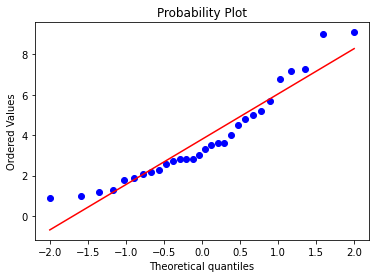

In [23]:
x = [0.9, 1.0, 1.2, 2.2, 1.9, 3.6, 2.8, 5.2, 1.8, 2.1, 6.8, 1.3, 3.0, 4.5, 2.8, 2.3, 2.7, 5.7, 4.8, 3.5, 2.6, 3.3, 5.0, 4.0, 7.2, 9.1, 2.8, 3.6, 7.3, 9.0]
stats.probplot(x, dist="norm", plot=plt)

In [25]:
stats.norm.ppf(0.98+((1-0.98)/2))

2.3263478740408408